# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [31]:
df['media'] = (df['p1'] + df['p2'])/2
df['diff'] = df['p2'] - df['p1']

T_matrix = np.array([[ .5, .5], [ -1, 1]])
mult_matrix = np.matmul(T_matrix, df[['p1', 'p2']].to_numpy().transpose())
df_transform = pd.DataFrame(mult_matrix.T, columns=['media_transf', 'diff_transf'])
df = pd.concat([df, df_transform], axis=1)

df.head()

,p1,p2,media,diff,media_transf,diff_transf
0,6.964692,7.943428,7.454060,0.978736,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712,8.066546,1.743712


b) Calcule a correlação entre os dados da **p1** e **p2**

<AxesSubplot:>

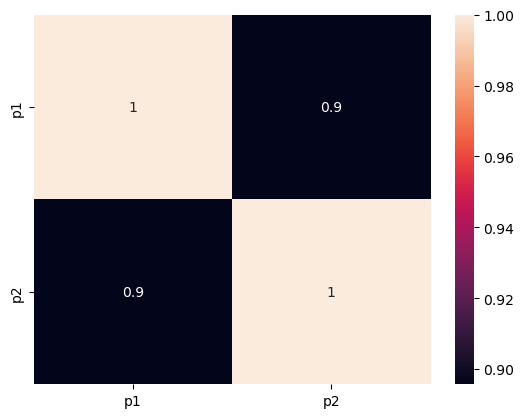

In [35]:
sns.heatmap(df[['p1', 'p2']].corr(), annot=True)

c) Calcule a correlação entre os dados transformados (média e diferença)

<AxesSubplot:>

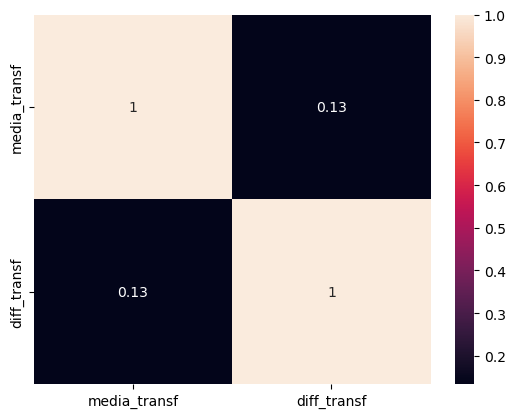

In [38]:
sns.heatmap(df[['media_transf', 'diff_transf']].corr(), annot=True)

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [39]:
df['sum'] = df['p1'] + df['p2']

T_matrix = np.array([[1, 1]])
mult_matrix = np.matmul(T_matrix, df[['p1', 'p2']].to_numpy().transpose())
df_transform = pd.DataFrame(mult_matrix.T, columns=['sum_transf'])
df = pd.concat([df, df_transform], axis=1)

df.head()

,p1,p2,media,diff,media_transf,diff_transf,sum,sum_transf
0,6.964692,7.943428,7.454060,0.978736,7.454060,0.978736,14.908120,14.908120
1,2.861393,5.099537,3.980465,2.238143,3.980465,2.238143,7.960930,7.960930
2,2.268515,0.974429,1.621472,-1.294085,1.621472,-1.294085,3.242944,3.242944
3,5.513148,4.474359,4.993754,-1.038788,4.993754,-1.038788,9.987507,9.987507
4,7.194690,8.938402,8.066546,1.743712,8.066546,1.743712,16.133092,16.133092


In [44]:
def translin(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = (df.p2.max()+df.p1.max())*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')
    
    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(df_rot[0,:], df_rot[1,:], label='rotação')

    ax.legend(loc='upper left')

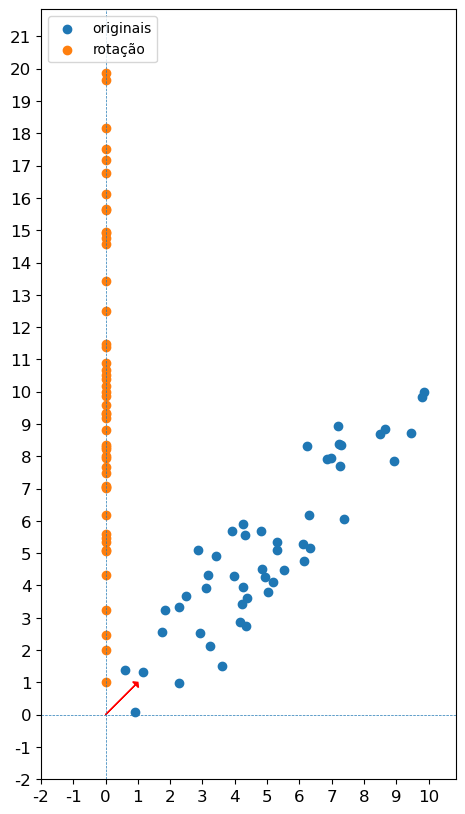

In [45]:
t = np.array([[ 0, 0],
              [ 1, 1]])
translin(t)